     km    Hm      Rad
0    48  1278      MTB
1    87  1100  Rennrad
2   102  2458      MTB
3    39  2100      MTB
4    77   473  Rennrad
5   109   289  Rennrad
6    33   489      MTB
7    41   622  Rennrad
8    71  1921  Rennrad
9    54  1500      MTB
10   22   650      MTB


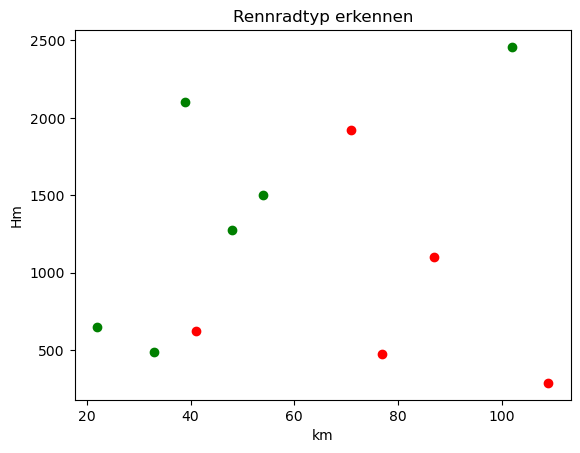

In [25]:
# -------------------------------------------------
# Raddatenanalyse - war es ein Rennrad oder ein MTB
# -------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

trainingData = 'raddaten_aufgabe.csv'

#print(os.getcwd() )

#os.chdir('./')  # put your own path here ...

data = pd.read_csv(trainingData, sep=";")

print(data)

pos = (data["Rad"] == 'MTB')
positives = data[pos]
positives = np.array(positives)

neg = (data["Rad"] == 'Rennrad')
negatives = data[neg]
negatives = np.array(negatives)

plt.scatter(positives[:,0],positives[:,1], color = 'green')  # grün = MTB
plt.scatter(negatives[:,0],negatives[:,1], color = 'red')    # rot  = Rennrad

plt.title('Rennradtyp erkennen')
plt.xlabel('km')
plt.ylabel('Hm')
plt.show()

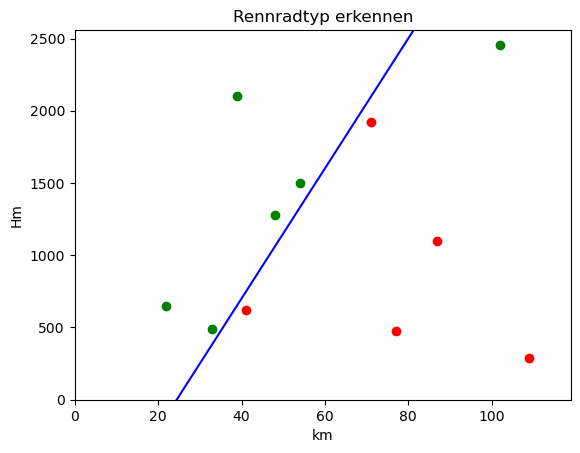

In [26]:
# Kann man eine Trenngerade eintragen?

# Ein Versuch ... so gut wie möglich ... mit der Maßgabe "alle roten richtig"

alpha = -1100
beta  = 45
plt.xlim(0,data['km'].max()+10)
plt.ylim(0,data['Hm'].max()+100)

plt.plot([data['km'].min() ,data['km'].max()],[alpha+beta*data['km'].min(),alpha+beta*data['km'].max()],color='blue')
plt.scatter(positives[:,0],positives[:,1], color = 'green')  # grün = MTB
plt.scatter(negatives[:,0],negatives[:,1], color = 'red')    # rot  = Rennrad
plt.title('Rennradtyp erkennen')
plt.xlabel('km')
plt.ylabel('Hm')
plt.show()

c:\01_Projects\DHBW\Maschinelles Lernen
         Hm         km      speed     type  duration  binary
0     134.8    4.95890  13.871984      MTB        36       1
1     329.2   11.10381  16.860246      MTB        49       1
2     388.2   16.05416  17.175754      MTB        63       1
3     450.2   22.26266  17.402926      MTB        83       1
4     202.4   14.16321  12.462230      MTB        84       1
..      ...        ...        ...      ...       ...     ...
349  1148.4   80.03429  27.025878  Rennrad       193       0
350   272.8   35.41842  24.572271  Rennrad        86       0
351  1308.2  106.12610  26.003078  Rennrad       310       0
352   208.8   23.42685  27.829691  Rennrad       154       0
353   758.2   41.11274  25.922202  Rennrad       110       0

[354 rows x 6 columns]


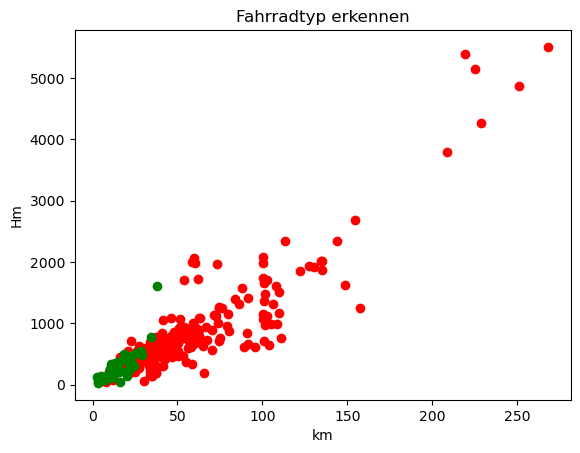

In [27]:
# -------------------------------------------------
# Raddatenanalyse - jetzt mit realen Daten
# -------------------------------------------------

trainingData = 'myrides_2_class.csv'

print(os.getcwd() )

#os.chdir('./')  # put your own path here ...

data = pd.read_csv(trainingData, sep=";", decimal = ",")    

print(data)

pos = (data["type"] == 'MTB')
positives = data[pos]
positives = np.array(positives)

neg = (data["type"] == 'Rennrad')
negatives = data[neg]
negatives = np.array(negatives)

plt.scatter(negatives[:,1],negatives[:,0], color = 'red')    # rot  = Rennrad
plt.scatter(positives[:,1],positives[:,0], color = 'green')  # grün = MTB


plt.title('Fahrradtyp erkennen')
plt.xlabel('km')
plt.ylabel('Hm')
plt.show()

In [28]:
X_train = np.array(pd.read_csv(trainingData, sep=";", decimal = ",", usecols = ['Hm','km']))
y_train = np.array(pd.read_csv(trainingData, sep=";", decimal = ",", usecols = ['binary']))

### Trainings- und Testdaten trennen

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)


Neuronales Netz konfigurieren und 

In [30]:
# -------------------------------------------------
# Raddatenanalyse - jetzt mit realen Daten
# -------------------------------------------------

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


c:\00_Programme\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
# Gib mir das Ergebnis
print(model.score(X_test, y_test))


0.8873239436619719
